# **MuJoCo**

MuJoCo stands for Multi-Joint dynamics with Contact. It is a general purpose physics engine that aims to facilitate research and development in robotics, biomechanics, graphics and animation, machine learning, and other areas that demand fast and accurate simulation of articulated structures interacting with their environment.

https://mujoco.readthedocs.io/en/stable/overview.html

## **How to install MuJoCo**
Mujoco avalible on PyPi: https://pypi.org/project/mujoco/

```
pip install mujoco
```



# **XML: MJCF and URDF models**

**Extensible Markup Language (XML)** is a markup language and file format for storing, transmitting, and reconstructing arbitrary data.

The user defines models in the native **MJCF** scene description language – an XML file format designed to be as human readable and editable as possible.

**Unified Robot Description Format (URDF)** is an XML format for representing a robot model. URDF is commonly used in Robot Operating System (ROS) tools such as rviz (Ros Visualization tool) and Gazebo simulator. The model consists of links and joints motion.



## **How to visualize MJCF file?**
```bash
python -m mujoco.viewer --mjcf=**filename**.xml
```

## **MJCF example**


### **Simple example**
```xml
<mujoco model="simple_example">

    <visual>
        <headlight ambient="0.5 0.5 0.5" />
    </visual>

    <asset>
        <material name="white" rgba="1 1 1 1" />
    </asset>

    <option gravity="0 0 -9.81" />

    <worldbody>
    <light diffuse=".5 .5 .5" pos="0 0 3" dir="0 0 -1"/>
        <geom type="plane" size="1 1 0.1" rgba="0 .9 0 1"/>
        <body pos="0 0 1" euler="0 0 0">
            <joint type="free"/>
            <inertial pos="0 0 0" mass="1" diaginertia="0.01 0.01 0.01"/>
            <geom type="box" size=".1 .2 .3" rgba=".9 0 0 1"/>
            <!-- COmment -->
            <!--geom type="box" size=".1 .2 .3" material="white"/-->
        </body>

        <body pos="0 0 1.5" euler="0 1.57 0">
            <joint type="free"/>
            <inertial pos="0 0 0" mass="1" diaginertia="0.01 0.01 0.01"/>
            <geom type="box" size=".1 .2 .3" rgba="0 0 .9 1"/>
        </body>

        <body pos="0.3 0 1.8" euler="0 1.57 0">
            <joint type="free"/>
            <inertial pos="0 0 0" mass="1" diaginertia="0.01 0.01 0.01"/>
            <geom type="sphere" size=".1" rgba=".5 .5 .5 1"/>
        </body>
    </worldbody>

</mujoco>
```



### **Add joints**
```xml
<mujoco model="joint_example">

    <worldbody>
        <light name="top" pos="0 0 1"/>
        <body name="box_and_sphere" euler="0 0 -30">
            <joint name="swing" type="hinge" axis="1 -1 0" pos="-.2 -.2 -.2"/>
            <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
            <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
        </body>
    </worldbody>

</mujoco>
```

### **Tendon example**
```xml
<mujoco model="tendon">

    <default>
        <joint axis="0 1 0" range="0 60" limited="true"/>
        <geom type="capsule" size=".01" rgba=".9 .7 .1 1"/>
        <site rgba=".9 .9 .9 1"/>
        <default class="visual_cylinder">
            <geom type="cylinder" fromto="0 .015 0 0 -.015 0" size=".02" rgba=".3 .9 .3 .4"/>
        </default>
    </default>

    <worldbody>
        <light pos="0 0 1"/>
        <body name="weight" pos="-.03 0 .175">
            <joint axis="0 0 1" pos="0 0 .025" type="slide"/>
            <geom type="cylinder" size=".03 .025" density="5000" rgba=".2 .2 .5 1"/>
            <site name="s1" pos="0 0 .025"/>
        </body>
        <site name="s2" pos="-.03 0 .33"/>
            <body pos="0 0 .3">
            <joint/>
            <geom name="g1" class="visual_cylinder"/>
            <geom fromto="0 0 0 .1 0 0"/>
            <site name="s3" pos=".02 0 .03"/>
            <body pos=".1 0 0">
                <joint/>
                <geom name="g2" class="visual_cylinder"/>
                <geom fromto="0 0 0 .1 0 0"/>
                <site name="s4" pos=".03 0 .01"/>
                <site name="s5" pos=".05 0 .02"/>
                <site name="side2" pos="0 0 .03"/>
                <body pos=".1 0 0">
                    <joint/>
                    <geom name="g3" class="visual_cylinder"/>
                    <geom fromto="0 0 0 .1 0 0"/>
                    <site name="s6" pos=".03 0 .01"/>
                    <site name="side3" pos="0 0 .03"/>
                </body>
            </body>
        </body>
    </worldbody>

    <tendon>
        <spatial range="0 .33" limited="true" width=".002" rgba=".95 .3 .3 1">
            <site site="s1"/>
            <site site="s2"/>
            <geom geom="g1"/>
            <site site="s3"/>
            <pulley divisor="2"/>
            <site site="s3"/>
            <geom geom="g2" sidesite="side2"/>
            <site site="s4"/>
            <pulley divisor="2"/>
            <site site="s3"/>
            <geom geom="g2" sidesite="side2"/>
            <site site="s5"/>
            <geom geom="g3" sidesite="side3"/>
            <site site="s6"/>
        </spatial>
    </tendon>

</mujoco>
```

### **Closed loop example**

```xml
<mujoco>
    <option timestep="0.0002" />
    <actuator>
        <motor gear="10000" joint="hinge_1" name="actuator_motor" ctrlrange="-300 300" ctrllimited="true"/>
    </actuator>
    <asset>
        <material name="blue_" rgba="0 0 1 1" />
        <material name="green" rgba="0 1 0 1" />
        <material name="red__" rgba="1 0 0 1" />
        <material name="white" rgba="1 1 1 1" />
    </asset>
    <worldbody>
        <geom type="plane" size="10 10 0.1" pos="0 0 -5" rgba=".9 0 0 1" />
        <light diffuse=".5 .5 .5" pos="0 0 3" dir="0 0 -1" />
        <body name="link_1" pos="0 0 0">
            <geom type="cylinder" size=".2    2" pos="0 0 2" euler="0 0 0" material="red__" />
            <geom type="cylinder" size=".25 .25" pos="0 0 4" euler="0 90 0" material="red__" />
            <geom type="cylinder" size=".25 .25" pos="0 0 0" euler="0 90 0" material="red__" />
            <body name="link_2" pos="0.5 0 0" euler="0 0 0">
                <joint name="hinge_1" pos="0 0 0" axis="1 0 0" />
                <geom type="cylinder" size=".2    2" pos="0 2 0" euler="90 0 0" material="blue_" />
                <geom type="cylinder" size=".25 .25" pos="0 4 0" euler="0 90 0" material="blue_" />
                <geom type="cylinder" size=".25 .25" pos="0 0 0" euler="0 90 0" material="blue_" />
                <body name="link_3" pos="-0.5 4 0" euler="0 0 0">
                    <joint name="hinge_2" pos="0 0 0" axis="1 0 0" />
                    <geom type="cylinder" size=".2    2" pos="0 0 2" euler="0 0 0" material="green" />
                    <geom type="cylinder" size=".25 .25" pos="0 0 0" euler="0 90 0" material="green" />
                    <geom type="cylinder" size=".25 .25" pos="0 0 4" euler="0 90 0" material="green" />
                    <body name="link_4" pos="0.5 0 4" euler="0 0 0">
                        <joint name="hinge_3" pos="0 0 0" axis="1 0 0" />
                        <geom type="cylinder" size=".2    2" pos="0 -2 0" euler="90 0 0" material="white" />
                        <geom type="cylinder" size=".25 .25" pos="0 0 0" euler="0 90 0" material="white" />
                        <geom type="cylinder" size=".25 .25" pos="0 -4 0" euler="0 90 0" material="white" />
                    </body>
                </body>
            </body>
        </body>
    </worldbody>
    <equality>
        <connect name="kinematic_link" active="true" body1="link_1" body2="link_4" anchor="0 0 4" />
    </equality>
    <contact>
        <exclude body1="link_1" body2="link_2"/>
        <exclude body1="link_1" body2="link_3"/>
        <exclude body1="link_1" body2="link_4"/>
        <exclude body1="link_2" body2="link_3"/>
        <exclude body1="link_2" body2="link_4"/>
        <exclude body1="link_3" body2="link_4"/>
    </contact>
</mujoco>
```

# **How to write XML**
https://mujoco.readthedocs.io/en/stable/XMLreference.html#body-joint

# **Tasks**


> * Make an xml model for robotics arm with following morfology: shoulder pitch -> shoulder roll -> shoulder yaw -> link -> elbow pitch -> link > end-effector.
The sizes and masses for motors bring from data sheet on motor [MF4005v2(RMD-L-4005)BLDC](https://aliexpress.ru/item/1005003261130247.html?spm=a2g2w.orderdetail.0.0.27814aa6f24V4l&sku_id=12000031590377027). Link lengths 100 mm, link mass 20 g

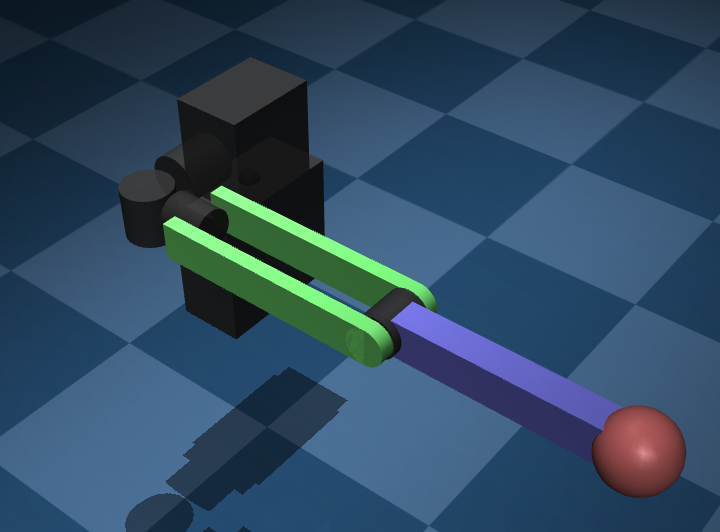

> * Make an xml for 4-bar mechanism with following the same motors and dimentions as in the previous task

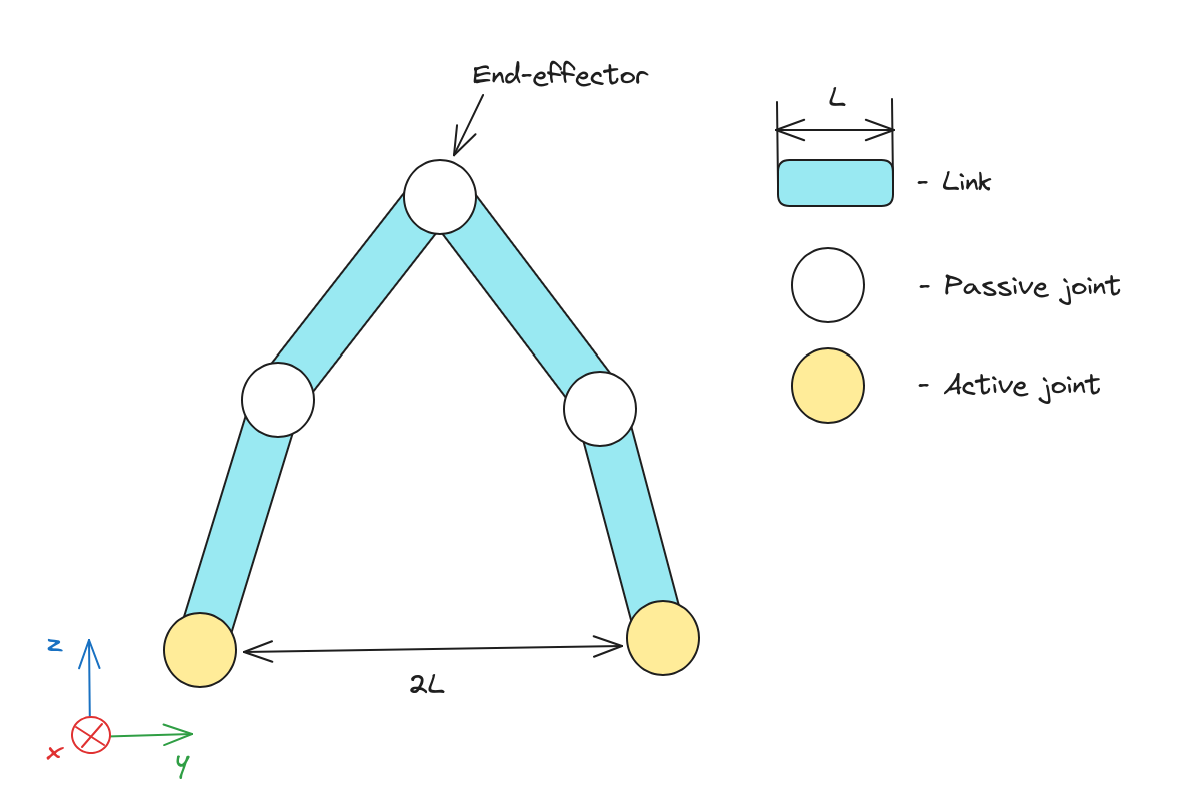